In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import datetime
import os
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
data1 = {}
i = 1
for file in os.listdir("./sec1"):
    if file.endswith(".csv"):
        filename = file[:1].lower() + "df"
        dummy = pd.read_csv(os.path.join("./sec1", file))
        data1[filename] = dummy
        i+=1
        
data2 = {}
i = 1
for file in os.listdir("./sec2"):
    if file.endswith(".csv"):
        filename = file[:1].lower() + "df"
        dummy = pd.read_csv(os.path.join("./sec2", file))
        data2[filename] = dummy
        i+=1

In [3]:
for key in data1.keys():
    for idx, row in data1[key].iterrows():
        data1[key] = data1[key].ix[1:]
        data1[key]['date'] = pd.to_datetime(data1[key]['date'])
        data1[key]['close'] = (data1[key]['close'] - data1[key]['close'].min()) / (data1[key]['close'].max() - data1[key]['close'].min())

for key in data2.keys():
    for idx, row in data2[key].iterrows():
        data2[key] = data2[key].ix[1:]
        data2[key]['date'] = pd.to_datetime(data2[key]['date'])
        data2[key]['close'] = (data2[key]['close'] - data2[key]['close'].min()) / (data2[key]['close'].max() - data2[key]['close'].min())

//anaconda/envs/Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/envs/Python3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/envs/Python3/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

<h1>Plotting End Of Day values for Stocks - Fiat, Ford, Chevy, Tesla.</h1>

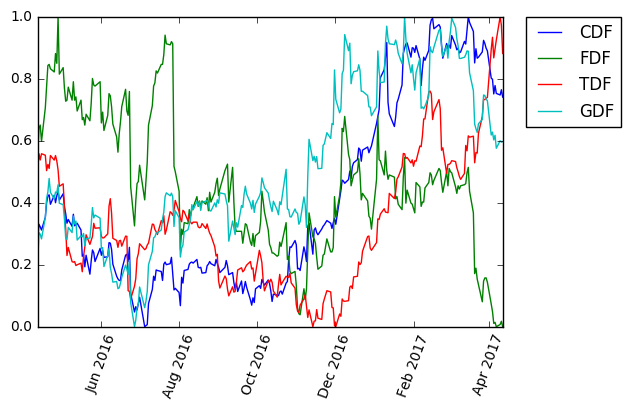

In [4]:
for key in data1.keys():
    plt.plot(data1[key]['date'], data1[key]['close'], label=key.upper())
plt.xticks(rotation=70)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<h1>Plotting End Of Day Percentage Change values for Stocks - Exxon Mobil, ConocoPhillips, Baker Hughes, Williams Companies</h1>

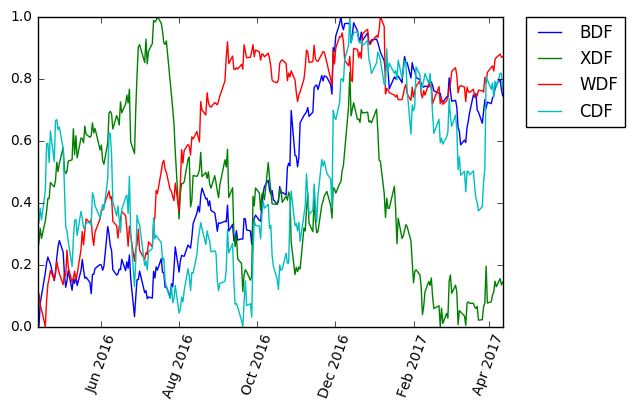

In [5]:
for key in data2.keys():
    plt.plot(data2[key]['date'], data2[key]['close'], label=key.upper())
plt.xticks(rotation=70)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [6]:
moving_data1= {}
for key in data1.keys():
    dfname = "moving_" + key
    dummy = pd.rolling_mean(data1[key]['close'],12)
    moving_data1[dfname] = dummy
    data1[key]['mod'] = data1[key]['close'] - dummy

moving_data2= {}
for key in data2.keys():
    dfname = "moving_" + key
    dummy = pd.rolling_mean(data2[key]['close'],12)
    moving_data2[dfname] = dummy
    data2[key]['mod'] = data2[key]['close'] - dummy

//anaconda/envs/Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
//anaconda/envs/Python3/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()


<h1>Plotting Detrended data</h1>

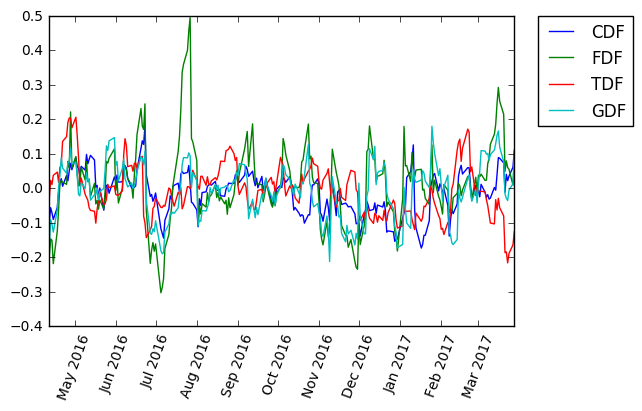

In [7]:
for key in data1.keys():
    plt.plot(data1[key]['date'], data1[key]['mod'], label=key.upper())
plt.xticks(rotation=70)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

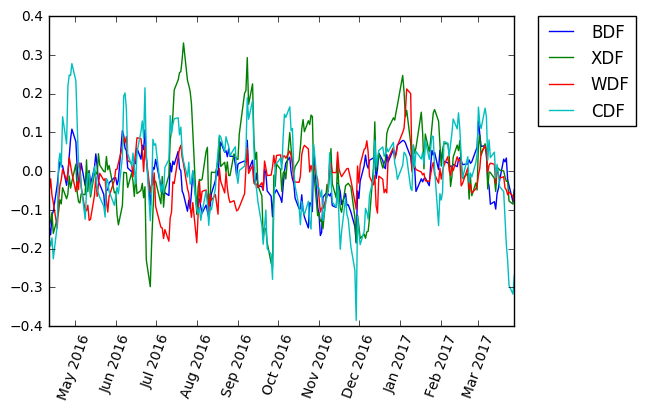

In [8]:
for key in data2.keys():
    plt.plot(data2[key]['date'], data2[key]['mod'], label=key.upper())
plt.xticks(rotation=70)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [41]:
mat = np.transpose(np.matrix(data1["gdf"]['close']))
mat1 = np.transpose(np.matrix(data1["tdf"]['close']))

In [44]:
mat = np.append(mat, mat1,1)

In [45]:
mat.shape

(254, 2)

In [60]:
from statsmodels.tsa import stattools
from scipy import stats
result = statsmodels.tsa.stattools.grangercausalitytests(mat, 30, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1403  , p=0.2866  , df_denom=250, df_num=1
ssr based chi2 test:   chi2=1.1540  , p=0.2827  , df=1
likelihood ratio test: chi2=1.1514  , p=0.2833  , df=1
parameter F test:         F=1.1403  , p=0.2866  , df_denom=250, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8778  , p=0.4170  , df_denom=247, df_num=2
ssr based chi2 test:   chi2=1.7912  , p=0.4084  , df=2
likelihood ratio test: chi2=1.7848  , p=0.4097  , df=2
parameter F test:         F=0.8778  , p=0.4170  , df_denom=247, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8367  , p=0.4749  , df_denom=244, df_num=3
ssr based chi2 test:   chi2=2.5821  , p=0.4606  , df=3
likelihood ratio test: chi2=2.5689  , p=0.4630  , df=3
parameter F test:         F=0.8367  , p=0.4749  , df_denom=244, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7800  , p=0.5391  